In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import accuracy_score

In [2]:
from datetime import datetime
end=datetime.now()
start=datetime(end.year-20,end.month,end.day)

In [3]:
stock = "TATAMTRDVR.NS"
tata_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
tata_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-11-05,30.049999,53.799999,30.049999,47.619999,41.277798,35770
2008-11-06,42.000000,47.970001,42.000000,43.860001,38.018574,220
2008-11-07,45.799999,52.340000,36.009998,48.200001,41.780552,1250
2008-11-10,55.000000,57.200001,42.099998,47.680000,41.329807,2505
2008-11-11,53.400002,56.000000,45.110001,51.720001,44.831749,450


In [5]:
tata_data.shape

(3891, 6)

In [6]:
tata_data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,3891.000000,3891.000000,3891.000000,3891.000000,3891.000000,3.891000e+03
mean,201.148684,204.229463,197.671976,200.785657,196.675981,2.986563e+06
std,133.689528,135.173219,131.865426,133.497825,134.298683,3.580621e+06
min,21.600000,22.670000,21.600000,22.670000,19.650732,0.000000e+00
25%,100.000000,101.800003,98.459999,99.885002,94.670769,1.295016e+06
50%,170.500000,173.199997,167.500000,170.149994,164.343369,2.119862e+06
75%,265.000000,268.375000,260.825012,264.375000,261.456451,3.522265e+06
max,796.000000,804.299988,782.950012,793.000000,793.000000,6.839672e+07


In [7]:
tata_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3891 entries, 2008-11-05 to 2024-08-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3891 non-null   float64
 1   High       3891 non-null   float64
 2   Low        3891 non-null   float64
 3   Close      3891 non-null   float64
 4   Adj Close  3891 non-null   float64
 5   Volume     3891 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 212.8 KB


In [8]:
tata_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 1.0, 'Closing price of Tata Motors data')

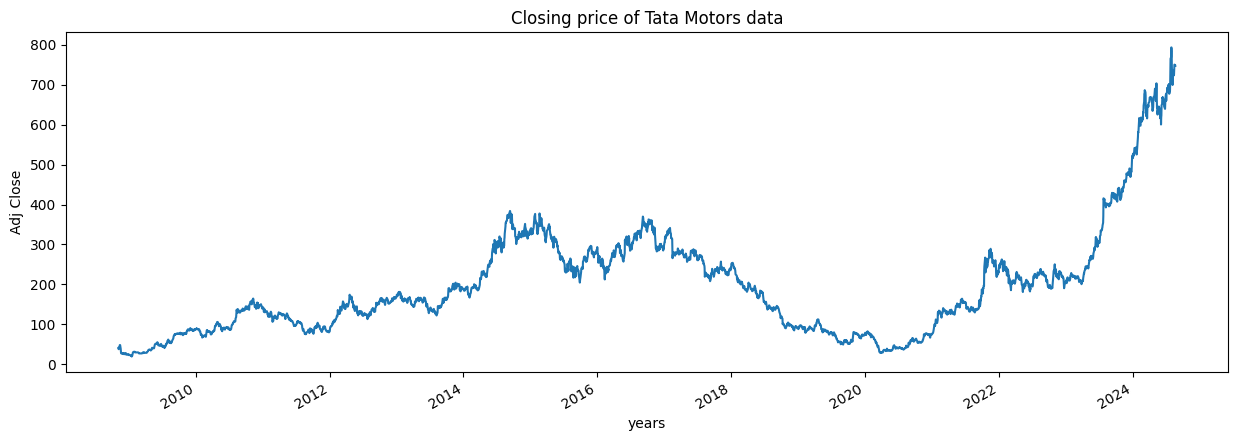

In [9]:
plt.figure(figsize = (15,5))
tata_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Tata Motors data")

In [10]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Tata Motors data")

In [12]:
tata_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

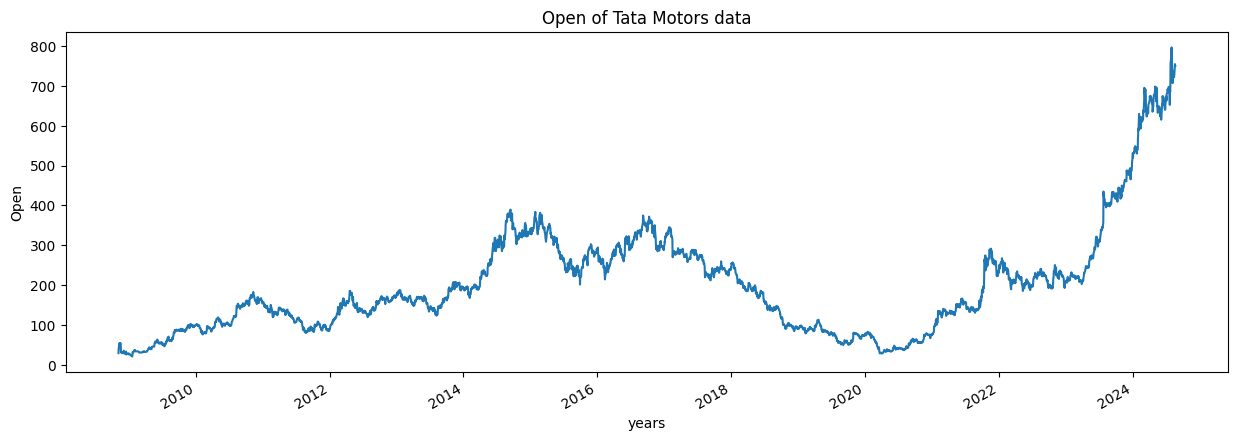

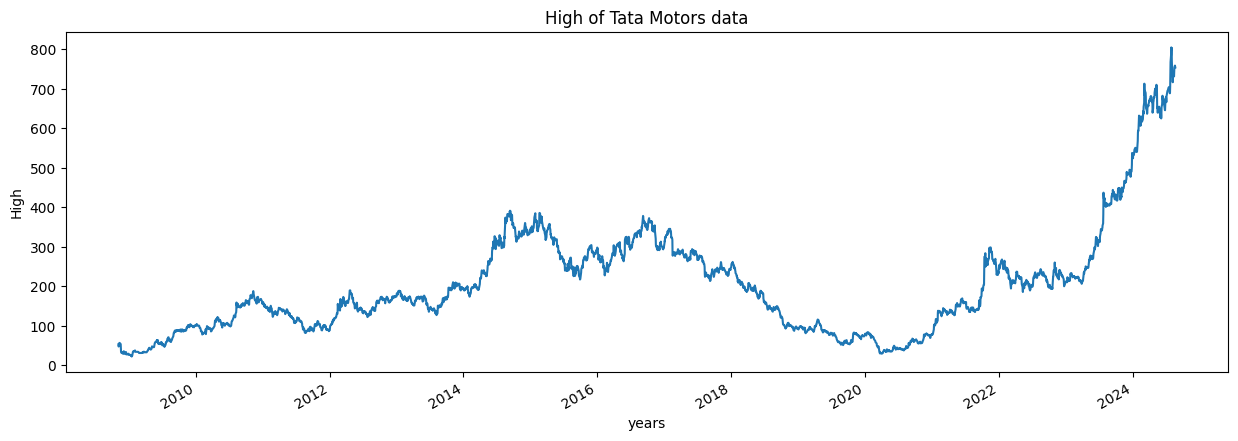

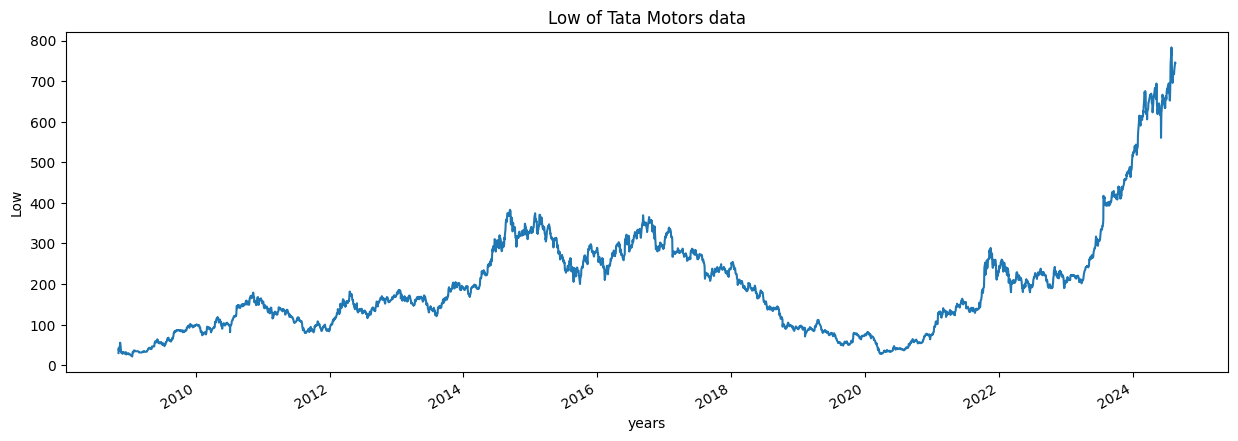

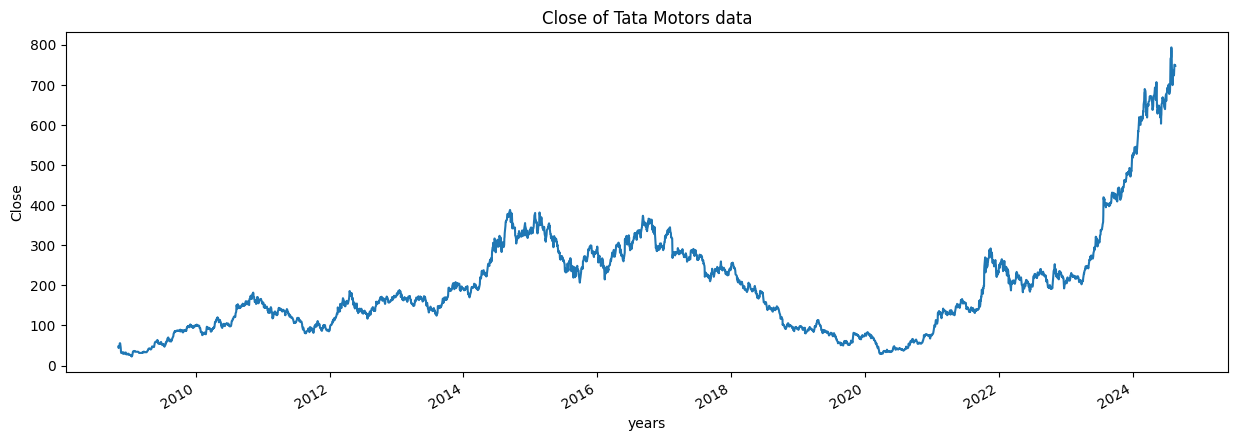

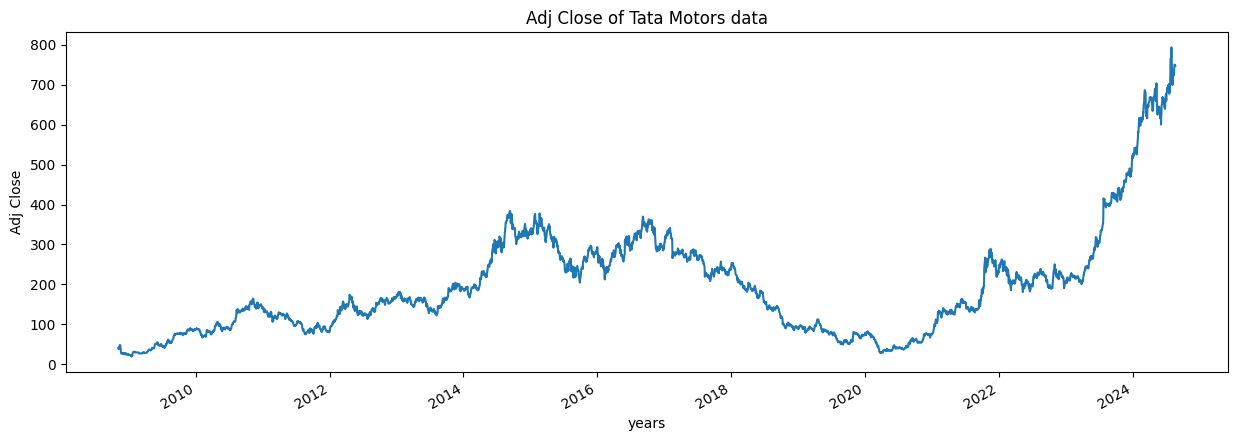

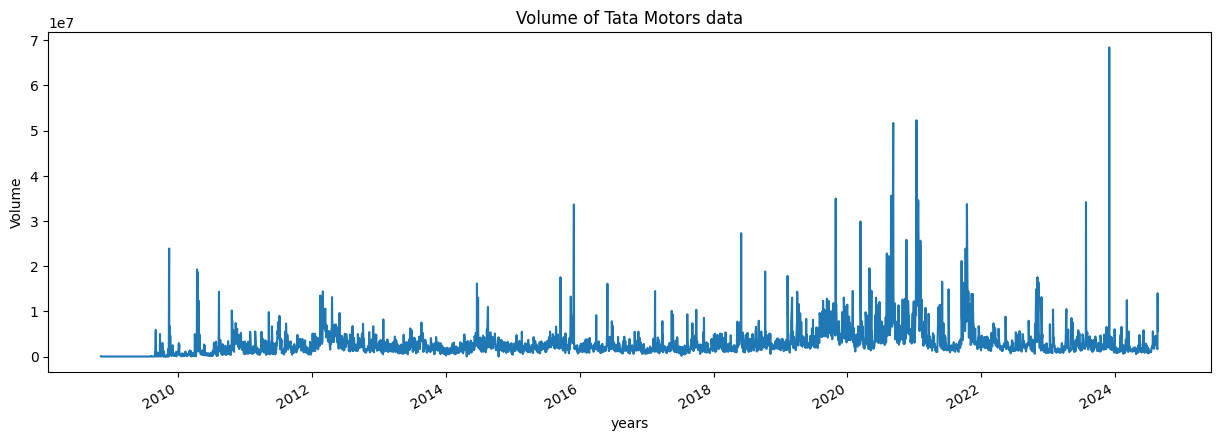

In [13]:
for column in tata_data.columns:
    plot_graph((15,5),tata_data[column], column)

In [14]:
for i in range(2014,2025):
    print(i,list(tata_data.index.year).count(i))

2014 244
2015 246
2016 246
2017 248
2018 246
2019 243
2020 251
2021 248
2022 248
2023 245
2024 156


In [15]:
tata_data['MA_for_240_days'] = tata_data['Adj Close'].rolling(240).mean()

In [16]:
tata_data['MA_for_240_days'][0:240].tail()

Date
2009-10-26         NaN
2009-10-27         NaN
2009-10-28         NaN
2009-10-29         NaN
2009-10-30    44.44726
Name: MA_for_240_days, dtype: float64

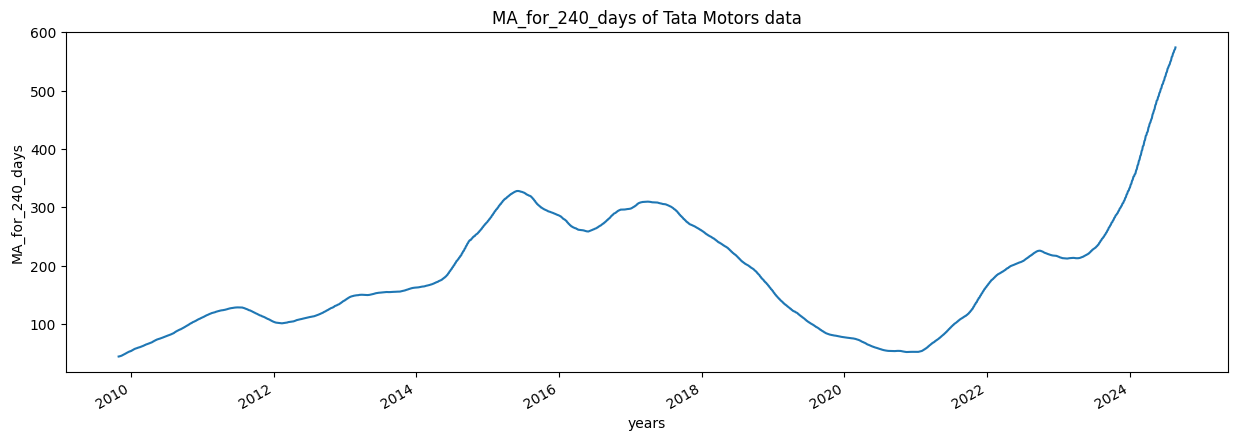

In [17]:
plot_graph((15,5), tata_data['MA_for_240_days'], 'MA_for_240_days')

<Figure size 640x480 with 0 Axes>

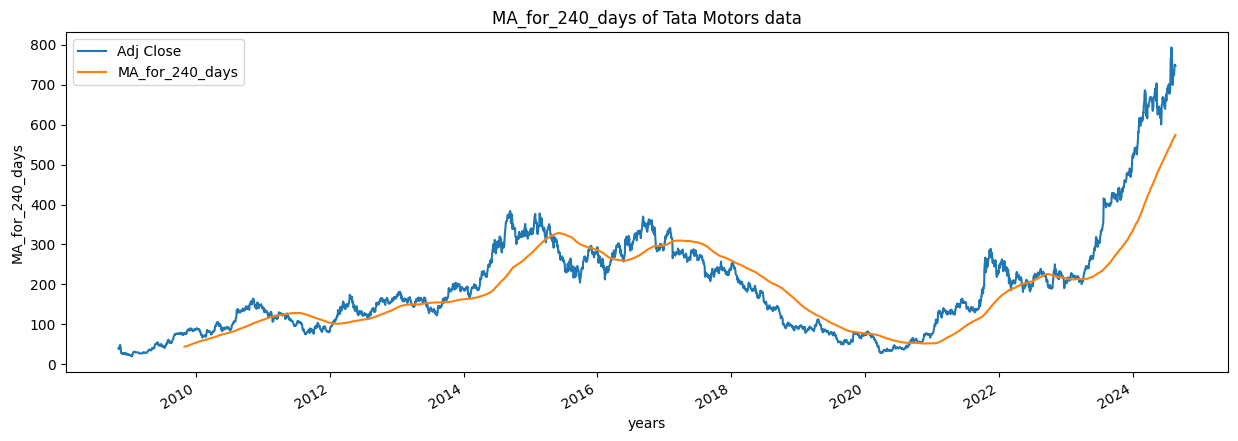

In [18]:
plot_graph((15,5),tata_data[['Adj Close','MA_for_240_days']], 'MA_for_240_days')

<Figure size 640x480 with 0 Axes>

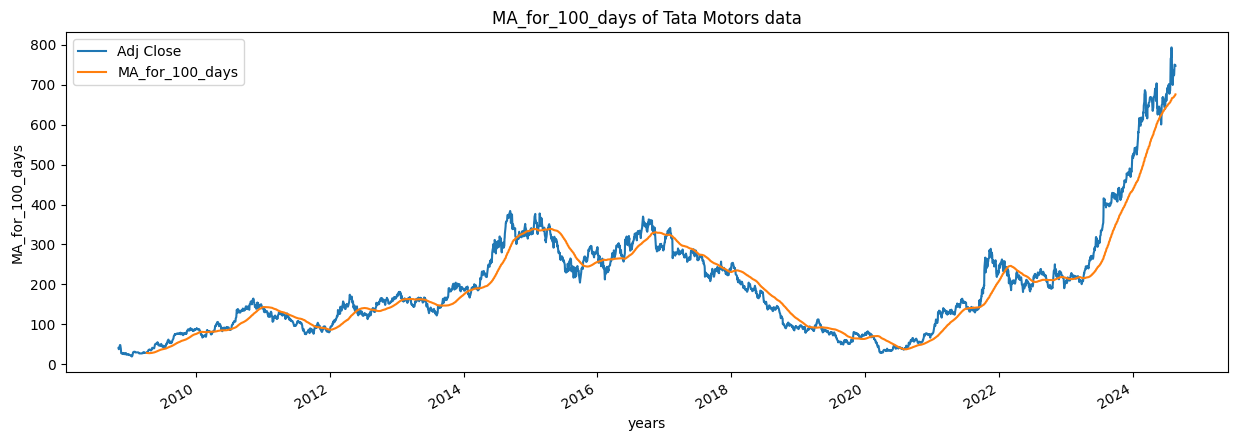

In [19]:
tata_data['MA_for_100_days'] = tata_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), tata_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

In [20]:
tata_data['percentage_change_cp'] = tata_data['Adj Close'].pct_change()
tata_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2008-11-05,41.277798,NaN
2008-11-06,38.018574,-0.078958
2008-11-07,41.780552,0.098951
2008-11-10,41.329807,-0.010788
2008-11-11,44.831749,0.084732


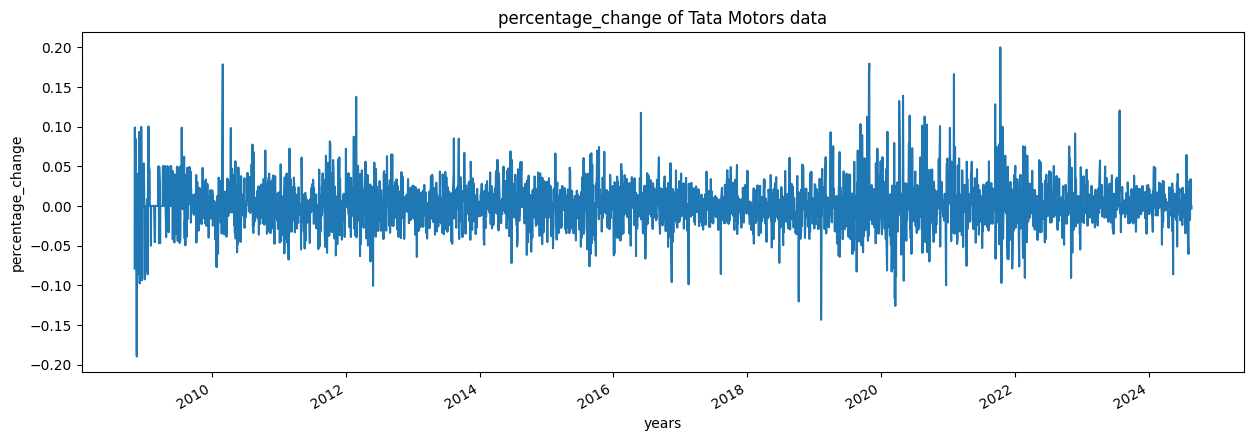

In [21]:
plot_graph((15,5), tata_data['percentage_change_cp'], 'percentage_change')

In [22]:
Adj_close_price = tata_data[['Adj Close']]

In [23]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([793.]), array([19.65073204]))

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.02796546],
       [0.02375103],
       [0.02861556],
       ...,
       [0.94316926],
       [0.94342789],
       [0.94038919]])

In [25]:
len(scaled_data)

3891

In [26]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    

x_data, y_data = np.array(x_data), np.array(y_data)

In [27]:
x_data[0],y_data[0]

(array([[0.02796546],
        [0.02375103],
        [0.02861556],
        [0.02803271],
        [0.03256099],
        [0.03699959],
        [0.03699959],
        [0.02529782],
        [0.01566963],
        [0.01099564],
        [0.01099564],
        [0.0099084 ],
        [0.0099084 ],
        [0.0099084 ],
        [0.01135431],
        [0.01135431],
        [0.0082159 ],
        [0.01135431],
        [0.01135431],
        [0.01135431],
        [0.00776756],
        [0.00776756],
        [0.00776756],
        [0.00776756],
        [0.00776756],
        [0.0110741 ],
        [0.0110741 ],
        [0.00765547],
        [0.00608627],
        [0.00608627],
        [0.00608627],
        [0.00608627],
        [0.00608627],
        [0.00608627],
        [0.00777877],
        [0.00777877],
        [0.00777877],
        [0.00470761],
        [0.00470761],
        [0.00470761],
        [0.00459553],
        [0.00459553],
        [0.00459553],
        [0.00215205],
        [0.00215205],
        [0

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3)

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2653, 100, 1)
(2653, 1)
(1138, 100, 1)
(1138, 1)


In [30]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

a:\stockpred\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - loss: 0.0018
Epoch 2/2
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - loss: 4.4054e-04


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [34]:
predictions = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [35]:
predictions

array([[0.34962717],
       [0.05305312],
       [0.05634271],
       ...,
       [0.33324617],
       [0.17936298],
       [0.26800033]], dtype=float32)

In [36]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[290.03464 ],
       [ 60.679325],
       [ 63.223324],
       ...,
       [277.36642 ],
       [158.36096 ],
       [226.9086  ]], dtype=float32)

In [37]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[300.2605896 ],
       [ 39.71022415],
       [ 47.48392868],
       ...,
       [279.73205566],
       [143.68553162],
       [219.74313354]])

In [38]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [39]:
rmse

15.765494414360044

In [40]:
splitting_len = int(len(x_data)*0.7)

In [41]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = tata_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2020-01-15,300.260590,290.034637
2020-01-16,39.710224,60.679325
2020-01-17,47.483929,63.223324
2020-01-20,165.504456,174.805252
2020-01-21,84.953163,97.738289


<Figure size 640x480 with 0 Axes>

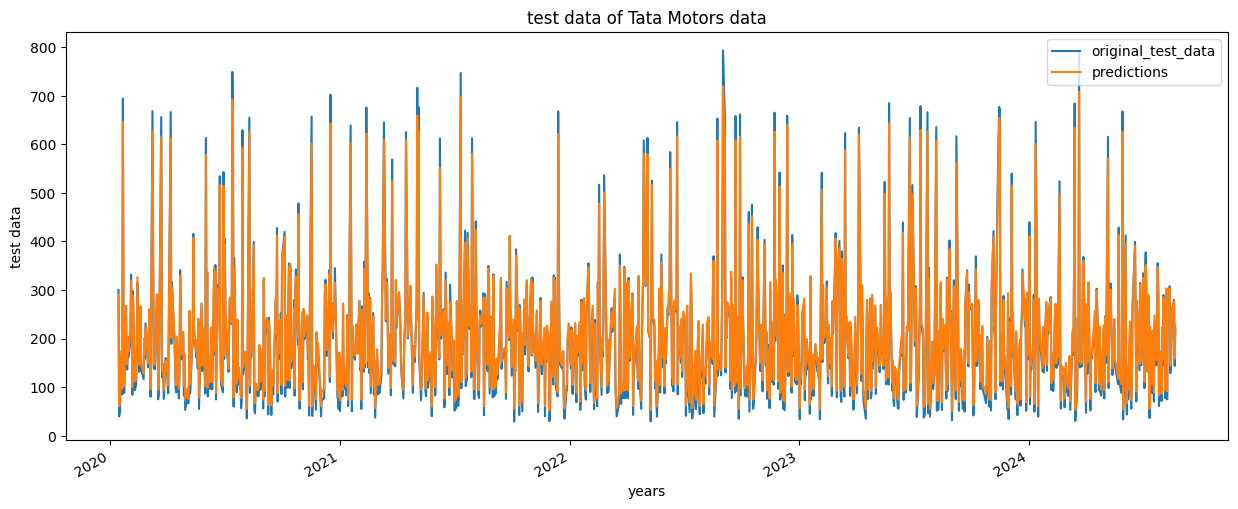

In [42]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

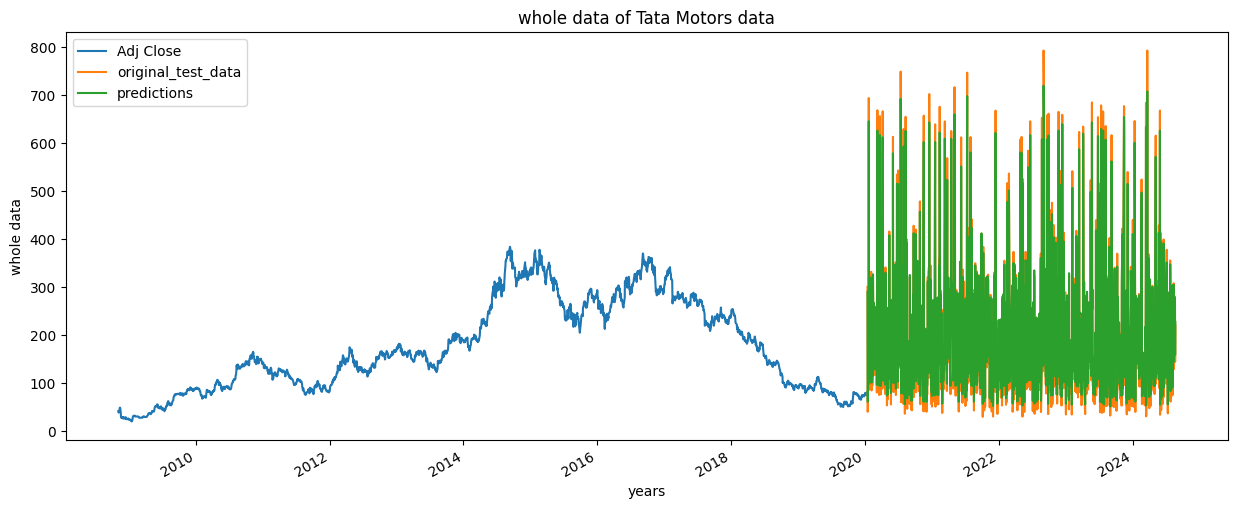

In [43]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [44]:
model.save("Latest_stock_price_model.keras")